# SC1015 Mini-Project

Group: FCEE

Lee Heng Sheng Brandon, U2322900C \
Alan Lee Leman, U2321753B \
Wee Zi Hao, U2323380H



**TO-DO**:

1. Finish data cleaning by balancing data. 

If possible, find a better/more ways of visualising distribution of categorical data than just countplot. 

2. Exploratory analysis
3. Logistic Regression etc

Some techniques we can consider:

Logistic Regression \
Naive Bayes \
Random Forest Classifier \
Extreme Gradient Boost \
K-Nearest Neighbour \
Decision Tree \
Support Vector Machine

**REMEMBER:**

1. Remember to add README file (3-5 minute summary, with all consulted references). 
2. Add citations/references for introduction
3. Weekly consultation with TA
4. Determine what techniques we will use in our project (logistic regression, decision tree/random forest, gridsearchcv)
5. Submit our presentation video, PPT/PDF slides used for the presentation and all code on github with their references.

**NOTE**:
1. Use snake-case naming convention
2. Use "" for strings and 4-space indentation.

## Introduction

Heart disease, also known as cardiovascular disease (CVD), refers to a range of conditions that affect the heart and blood vessels. As a whole, it is one of the leading causes of death globally, taking an estimated 17.9 million lives annually. In Singapore alone, CVD accounted for 31.4% of all deaths in 2022.

Early detection of heart diseases is cruical towards reducing suffering and preventing further heart complications. Such early identification would also aid in helping one change their lifestyle factors before it may be too late.

Current traditional methods of detecting CVD include electrocardiography (ECG) and angiography. Although ECG is non-invasive, it cannot provide a definite diagnosis of CVD. Conversely, while angiography may provide a more definite diagnosis, it is invasive and can have various side effects and complications.


Our project aims to provide a measure to detect CVD in a non-invasive but definite way for early screening purposes.

## Problem Statement

How may we accurately detect heart disease in a patient?\
Can we identify whether a patient has a heart disease or not accurately? (I think this problem statement more clear that we dealing with a class A or class B type of problem)

### Attribute Information

> 1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp`: Chest pain type (4 values) (Categorical)
4. `trestbps`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol`: Serum cholestoral in mg/dl (serum cholestoral in mg/dl) (Numerical)
6. `fbs`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak`: ST depression induced by exercise relative to rest (Numerical)
11. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
12. `ca`: Number of major vessels (0-3) colored by flourosopy (Categorical)
13. `thal`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
14. `target`: 0 = no heart disease; 1 = heart disease (Categorical)

The names and social security numbers of the patients have been removed from the database and replaced with dummy values.

## Overview

> 10% for coming up with your own problem definition based on a dataset \
10% for data preparation and cleaning to suit the problem of your choice \
20% for exploratory data analysis/visualization to gather relevant insights \
20% for the use of machine learning techniques to solve specific problem \
20% for the presentation of data-driven insights and the recommendations \
10% for the quality of your final team presentation and overall impressions \
10% for learning something new and doing something beyond this course 

1. Basic Exploration Analysis
2. Data Cleaning
3. Exploratory Data Analysis/Visualisation
4. Logistic Regression
5. Decision Tree & Random Forest
6. New technique beyond the course
7. Comparing our models
8. Insights and Conclusions

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python \
Pandas : Library for Data Acquisition and Preparation \
Matplotlib : Low-level library for Data Visualization \
Seaborn : Higher-level library for Data Visualization 

In [436]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

# Import essential models and functions from sklearn
from sklearn.metrics import mean_squared_error,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

sb.set() # set the default Seaborn style for graphics

### Import the Dataset

Dataset on [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). By David Lapp. 

### Context

This dataset dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [437]:
data = pd.read_csv("heart.csv")

print("Data dimensions:", data.shape)

data

Data dimensions: (1025, 14)


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

### Initial Exploratory Analysis

From our attribute information, we know that variables such as `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal` and `target` are categorical values. The remaining data should be numerical. 

In [438]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [439]:
data.describe().round(2)

age      sex       cp  trestbps     chol      fbs  restecg  \
count  1025.00  1025.00  1025.00   1025.00  1025.00  1025.00  1025.00   
mean     54.43     0.70     0.94    131.61   246.00     0.15     0.53   
std       9.07     0.46     1.03     17.52    51.59     0.36     0.53   
min      29.00     0.00     0.00     94.00   126.00     0.00     0.00   
25%      48.00     0.00     0.00    120.00   211.00     0.00     0.00   
50%      56.00     1.00     1.00    130.00   240.00     0.00     1.00   
75%      61.00     1.00     2.00    140.00   275.00     0.00     1.00   
max      77.00     1.00     3.00    200.00   564.00     1.00     2.00   

       thalach    exang  oldpeak    slope       ca     thal   target  
count  1025.00  1025.00  1025.00  1025.00  1025.00  1025.00  1025.00  
mean    149.11     0.34     1.07     1.39     0.75     2.32     0.51  
std      23.01     0.47     1.18     0.62     1.03     0.62     0.50  
min      71.00     0.00     0.00     0.00     0.00     0.00     0.00  
25%     132.00     0.00     0.00     1.00     0.00     2.00     0.00  
50%     152.00     0.00     0.80     1.00     0.00     2.00     1.00  
75%     166.00     1.00     1.80     2.00     1.00     3.00     1.00  
max     202.00     1.00     6.20     2.00     4.00     3.00     1.00

## Data Cleaning

> The dataset chosen by you may not be in the proper format to solve the problem you targeted. Preparing means cleaning the data, resizing/reshaping the data, removing outliers (if necessary), balancing imbalanced classes (if necessary), grouping the rows/columns as necessary, etc.

Notice from the attribute information that `thal` should be between 1-3 and `ca` should be between 0-3, but from the statistical summary of the data, we can see that there are some 0 `thal` values in the data (min = 0.00) and 4 `ca` values in the data (max = 4.00). Let us first remove these data.

In [440]:
clean_data = data[(data["thal"] != 0) & (data["ca"] != 4)].reset_index() # make sure to reset the index

clean_data

index  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0        0   52    1   0       125   212    0        1      168      0   
1        1   53    1   0       140   203    1        0      155      1   
2        2   70    1   0       145   174    0        1      125      1   
3        3   61    1   0       148   203    0        1      161      0   
4        4   62    0   0       138   294    1        1      106      0   
..     ...  ...  ...  ..       ...   ...  ...      ...      ...    ...   
995   1020   59    1   1       140   221    0        1      164      1   
996   1021   60    1   0       125   258    0        0      141      1   
997   1022   47    1   0       110   275    0        0      118      1   
998   1023   50    0   0       110   254    0        0      159      0   
999   1024   54    1   0       120   188    0        1      113      0   

     oldpeak  slope  ca  thal  target  
0        1.0      2   2     3       0  
1        3.1      0   0     3       0  
2        2.6      0   0     3       0  
3        0.0      2   1     3       0  
4        1.9      1   3     2       0  
..       ...    ...  ..   ...     ...  
995      0.0      2   0     2       1  
996      2.8      1   1     3       0  
997      1.0      1   1     2       0  
998      0.0      2   0     2       1  
999      1.4      1   1     3       0  

[1000 rows x 15 columns]

### Checking for Imbalance

An imbalanced dataset could affect FPR/FNR values of our model. Let us check for imbalance in any of the variables. For numerical variables, we shall visualise the distributions with boxplot, histogram/KDE and violinplot. For categorical variables, we shall use countplot. 

In [441]:
# Make a list of numerical and categorical variables
cat_var = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]
num_var = [var for var in clean_data.columns if var not in cat_var]

# Make a function for visualising numerical variables
def visualise(vars: list[str], kind: str): # kind is a string argument that accepts "num" or "cat" as a value
    if kind == "num":
        f, axes = plt.subplots(len(vars), 3, figsize = (24, 12))
        for i, v in enumerate(vars):
            sb.boxplot(data = clean_data[v], orient = 'h', ax = axes[i, 0]).set(ylabel = v)
            sb.histplot(data = clean_data[v], ax = axes[i, 1], kde = True)
            sb.violinplot(data = clean_data[v], orient = "h", ax = axes[i, 2]).set(ylabel = v)
        f.tight_layout() # formatting
    elif kind == "cat":
        f, axes = plt.subplots(len(vars), figsize = (24, 12))
        for i, v in enumerate(vars):
            # we sort the classes for each categorical variable by their counts
            sb.countplot(data = clean_data, x = v, orient = "h", ax = axes[i], order = clean_data[v].value_counts().index)
        f.tight_layout() # formatting
    else:
        raise Exception("Only 'num' or 'cat' values are accepted for the kind argument")

In [442]:
# Visualise the numerical variables
visualise(num_var, "num")

In [443]:
# Visualise the categorical variables

visualise(cat_var, "cat")

There seems to be an even distribution of 0 and 1 target values. 

## Assumptions of Logistic Regression

Because logistic regression does not assume normality, the model will not be affected by skew. Thus, we should not be removing outliers from our data.

Rather, logistic regression assumes the following:

1. Independence of Observations (which we shall assume)
2. Absence of Multicollinearity (independent variables should not be highly correlated with any other variable in the model)
3. Linearity of Logit (there is a linear relationship between the logit of the dependent variable and the independent variable)

We can use these assumptions to determine the relevant independent variables for our model. 

### Absence of Multicollinearity

We can test for this with VIF (Variance Inflation Factor). The formula is given as:

$VIF_i = \frac{1}{1 - R^2}$

Generally, a VIF above 5 indicates a high multicollinearity and we should avoid using these independent variables in our model. 

In [444]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

# Get independent variables
independent_vars = clean_data.drop("target", axis = 1)

# variance_inflation_factor expects the presence of a constant in the matrix of explanatory variables
# We can add a constant column using add_constant from statsmodels
independent_vars = add_constant(independent_vars)

VIF_df = pd.DataFrame(independent_vars.columns).rename({0 : "VARIABLES"}, axis = 1) # rename variable column

VIF_df["VIF"] = [vif(independent_vars, i) for i in range(len(independent_vars.columns))]

VIF_df

VARIABLES         VIF
0      const  212.920465
1      index    1.019369
2        age    1.483356
3        sex    1.150113
4         cp    1.307568
5   trestbps    1.182835
6       chol    1.135131
7        fbs    1.099220
8    restecg    1.076819
9    thalach    1.630236
10     exang    1.410955
11   oldpeak    1.765512
12     slope    1.657249
13        ca    1.358377
14      thal    1.140518

It appears that all our variables have a VIF below 5, and we do not need to drop any of them. 

### One-Hot Encoding

Since Logistic Regression is a linear model, we will need to convert categorical variables into a set of binary (dummy) variables before fitting them in the model. 

In [445]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# One-Hot Encoding of categorical predictors
cat_pred = clean_data[cat_var].drop("target", axis = 1)
ohe.fit(cat_pred)

cat_pred_ohe = pd.DataFrame(ohe.transform(cat_pred).toarray(), 
             columns = ohe.get_feature_names_out(cat_pred.columns))

# Check the encoded variables
cat_pred_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex_0      1000 non-null   float64
 1   sex_1      1000 non-null   float64
 2   cp_0       1000 non-null   float64
 3   cp_1       1000 non-null   float64
 4   cp_2       1000 non-null   float64
 5   cp_3       1000 non-null   float64
 6   fbs_0      1000 non-null   float64
 7   fbs_1      1000 non-null   float64
 8   restecg_0  1000 non-null   float64
 9   restecg_1  1000 non-null   float64
 10  restecg_2  1000 non-null   float64
 11  exang_0    1000 non-null   float64
 12  exang_1    1000 non-null   float64
 13  slope_0    1000 non-null   float64
 14  slope_1    1000 non-null   float64
 15  slope_2    1000 non-null   float64
 16  ca_0       1000 non-null   float64
 17  ca_1       1000 non-null   float64
 18  ca_2       1000 non-null   float64
 19  ca_3       1000 non-null   float64
 20  thal_1   

In [446]:
# Concatenate with the numeric variables
clean_data_ohe = pd.concat([clean_data[num_var], cat_pred_ohe, clean_data["target"]], axis = 1)

print("Dimensions:", clean_data_ohe.shape)

# Check the final DataFrame
clean_data_ohe

Dimensions: (1000, 30)


index  age  trestbps  chol  thalach  oldpeak  sex_0  sex_1  cp_0  cp_1  \
0        0   52       125   212      168      1.0    0.0    1.0   1.0   0.0   
1        1   53       140   203      155      3.1    0.0    1.0   1.0   0.0   
2        2   70       145   174      125      2.6    0.0    1.0   1.0   0.0   
3        3   61       148   203      161      0.0    0.0    1.0   1.0   0.0   
4        4   62       138   294      106      1.9    1.0    0.0   1.0   0.0   
..     ...  ...       ...   ...      ...      ...    ...    ...   ...   ...   
995   1020   59       140   221      164      0.0    0.0    1.0   0.0   1.0   
996   1021   60       125   258      141      2.8    0.0    1.0   1.0   0.0   
997   1022   47       110   275      118      1.0    0.0    1.0   1.0   0.0   
998   1023   50       110   254      159      0.0    1.0    0.0   1.0   0.0   
999   1024   54       120   188      113      1.4    0.0    1.0   1.0   0.0   

     ...  slope_1  slope_2  ca_0  ca_1  ca_2  ca_3  thal_1  thal_2  thal_3  \
0    ...      0.0      1.0   0.0   0.0   1.0   0.0     0.0     0.0     1.0   
1    ...      0.0      0.0   1.0   0.0   0.0   0.0     0.0     0.0     1.0   
2    ...      0.0      0.0   1.0   0.0   0.0   0.0     0.0     0.0     1.0   
3    ...      0.0      1.0   0.0   1.0   0.0   0.0     0.0     0.0     1.0   
4    ...      1.0      0.0   0.0   0.0   0.0   1.0     0.0     1.0     0.0   
..   ...      ...      ...   ...   ...   ...   ...     ...     ...     ...   
995  ...      0.0      1.0   1.0   0.0   0.0   0.0     0.0     1.0     0.0   
996  ...      1.0      0.0   0.0   1.0   0.0   0.0     0.0     0.0     1.0   
997  ...      1.0      0.0   0.0   1.0   0.0   0.0     0.0     1.0     0.0   
998  ...      0.0      1.0   1.0   0.0   0.0   0.0     0.0     1.0     0.0   
999  ...      1.0      0.0   0.0   1.0   0.0   0.0     0.0     0.0     1.0   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
995       1  
996       0  
997       0  
998       1  
999       0  

[1000 rows x 30 columns]

In [447]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into predictors and response
X = clean_data_ohe.drop("target", axis = 1)
y = clean_data_ohe["target"]

# Split the dataset into train and test (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

logreg = LogisticRegression(max_iter = 500) # default 100 max iterations leads to convergence
logreg.fit(X_train, y_train)

print("Classes:", logreg.classes_)
print("Intercept:", logreg.intercept_)
print("Coefficients:", [i.round(4) for i in logreg.coef_[0]])

Classes: [0 1]
Intercept: [-0.05937779]
Coefficients: [0.0, 0.0274, -0.0231, -0.0056, 0.0226, -0.4233, 0.8, -0.8508, -1.1398, -0.2573, 0.5865, 0.7599, -0.2126, 0.1618, -0.0766, 0.1258, -0.0999, 0.3324, -0.3832, 0.0848, -0.6154, 0.4798, 1.9009, -0.3448, -1.3342, -0.2728, 0.3953, 0.4394, -0.8855]


C:\Users\brand\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Goodness of Fit of Model

Let us check its classification accuracy and its confusion matrix. 

In [448]:
# Predict target with model
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", logreg.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", logreg.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8825

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.845



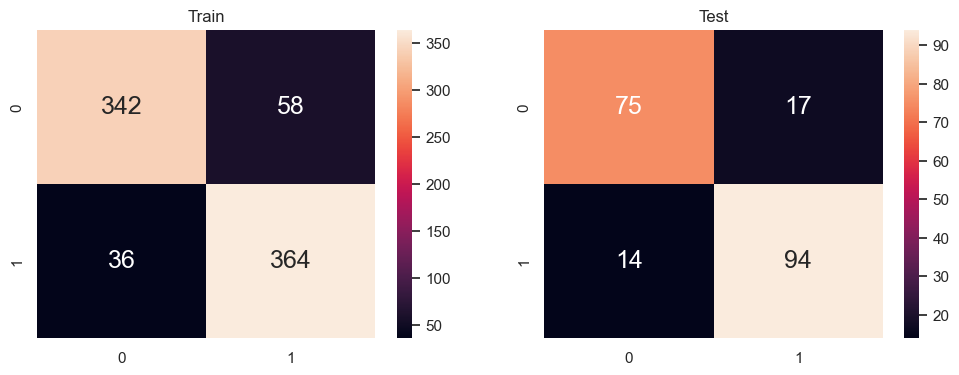

In [449]:
from sklearn.metrics import confusion_matrix

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

axes[0].set_title("Train")
axes[1].set_title("Test");

In [450]:
# Define a function to print rate metrics
def printMetrics(true, pred): 
    FP = confusion_matrix(true, pred)[0][1]
    FN = confusion_matrix(true, pred)[1][0]
    TP = confusion_matrix(true, pred)[1][1]
    TN = confusion_matrix(true, pred)[0][0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (FN + TP)
    print("TPR:\t", TPR)
    print("FPR:\t", FPR)
    print("TNR:\t", TNR)
    print("FNR:\t", FNR)
    print()

print("TRAIN SET:")
printMetrics(y_train, y_train_pred)
print("TEST SET:")
printMetrics(y_test, y_test_pred)

TRAIN:
TPR:	 0.91
FPR:	 0.145
TNR:	 0.855
FNR:	 0.09

TEST:
TPR:	 0.8703703703703703
FPR:	 0.18478260869565216
TNR:	 0.8152173913043478
FNR:	 0.12962962962962962



### Linearity of Logit

We shall check for this by plotting the logit of the dependent variable `target` against the independent variables in a scatterplot. We can also check for linearity with pearson's correlation. The formula for logit is given as: 

$Logit(p) = \log (\frac{p}{1 - p})$

In [451]:
logreg.predict_proba(X_train)

array([[0.64235338, 0.35764662],
       [0.99726104, 0.00273896],
       [0.06060003, 0.93939997],
       ...,
       [0.98817082, 0.01182918],
       [0.51437676, 0.48562324],
       [0.97806922, 0.02193078]])

### Feature Engineering

### Determining Relevant Variables

Since we are dealing with a binary classification problem, lets make use of the swarmplot to determine which numerical variables may be an important predictor in predicting heart disease

We will start by setting up a simple Classification Problem.

Response Variable : Heart Disease
Predictor Feature : All numerical variables in num_var

We start by splitting the cleaned numerical data sets into train and test sets randomly to perform classification

In [452]:
#Create the necessary dataframes
cleaned_numerical_data = clean_data[num_var]
age = pd.DataFrame(cleaned_numerical_data["age"])
trestbps = pd.DataFrame(cleaned_numerical_data["trestbps"])
chol = pd.DataFrame(cleaned_numerical_data["chol"])
thalach = pd.DataFrame(cleaned_numerical_data["thalach"])
oldpeak = pd.DataFrame(cleaned_numerical_data["oldpeak"])
target = pd.DataFrame(clean_data["target"])

#Compile them into a list for looping
cleaned_numerical_data_list = [age, trestbps, chol, thalach, oldpeak]

#List to store train test splits
train_splits = []
test_splits = []

#Loop to go through the numerical variables and place them into the list
for var in cleaned_numerical_data_list:
    var_train, var_test, target_train, target_test = train_test_split(var, target, test_size=0.25, random_state = 23)
    train_splits.append(var_train)
    test_splits.append(var_test)

We shall plot swarmplots to see whether each of the numerical variables could be an important predictor towards our target (heart disease)

C:\Users\brand\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\brand\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


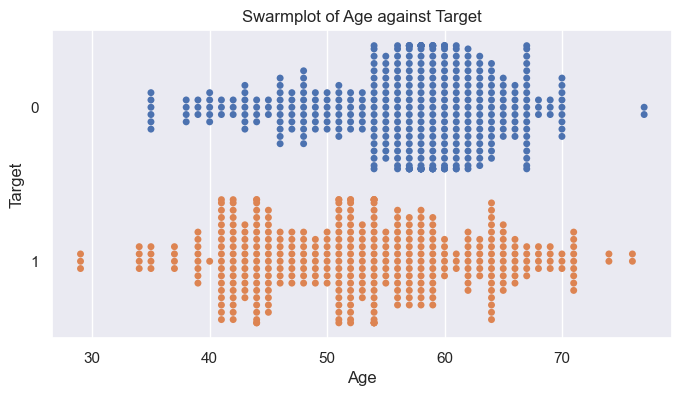

C:\Users\brand\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\Users\brand\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\brand\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\Users\brand\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


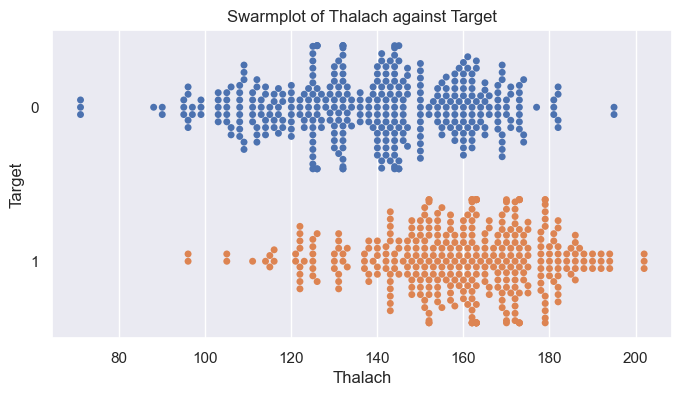

C:\Users\brand\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\brand\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


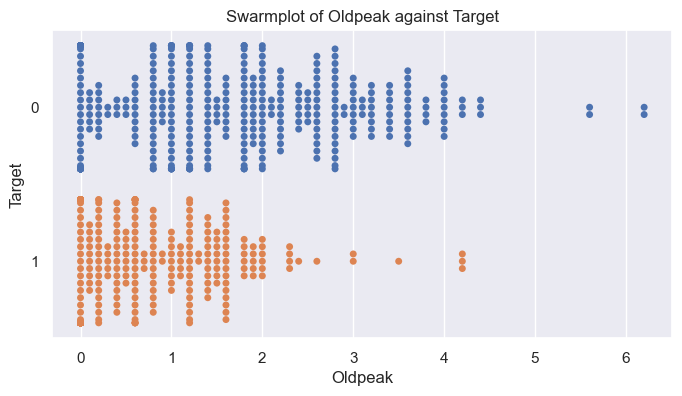

In [453]:
for i, var_name in enumerate(["age", "trestbps", "chol", "thalach", "oldpeak"]):
    #Creating the joint dataframe to plot swarmplot
    train_df = pd.concat([train_splits[i], target_train], axis=1)
    train_df.columns = [var_name, "target"]
    
    #Plotting the swarmplots
    plt.figure(figsize=(8, 4))
    sb.swarmplot(x=var_name, y="target", data=train_df, orient="h")
    plt.xlabel(var_name.capitalize())  # Capitalize the variable name for labeling
    plt.ylabel("Target")
    plt.title(f"Swarmplot of {var_name.capitalize()} against Target")
    plt.show()

We shall make use of a decision tree to see if any numerical variables might play a role in predicting our target since the swarmplot doesnt really tell us anything

[Text(0.49107142857142855, 0.9, 'thalach <= 147.5\ngini = 0.5\nsamples = 750\nvalue = [379, 371]\nclass = No Heart Disease'),
 Text(0.26785714285714285, 0.7, 'oldpeak <= 0.7\ngini = 0.372\nsamples = 332\nvalue = [250, 82]\nclass = No Heart Disease'),
 Text(0.14285714285714285, 0.5, 'age <= 53.5\ngini = 0.458\nsamples = 76\nvalue = [27, 49]\nclass = Heart Disease'),
 Text(0.07142857142857142, 0.3, 'chol <= 292.0\ngini = 0.095\nsamples = 20\nvalue = [1, 19]\nclass = Heart Disease'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]\nclass = Heart Disease'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No Heart Disease'),
 Text(0.21428571428571427, 0.3, 'age <= 59.5\ngini = 0.497\nsamples = 56\nvalue = [26, 30]\nclass = Heart Disease'),
 Text(0.17857142857142858, 0.1, 'gini = 0.384\nsamples = 27\nvalue = [20, 7]\nclass = No Heart Disease'),
 Text(0.25, 0.1, 'gini = 0.328\nsamples = 29\nvalue = [6, 23]\nclass = Heart Disease'),


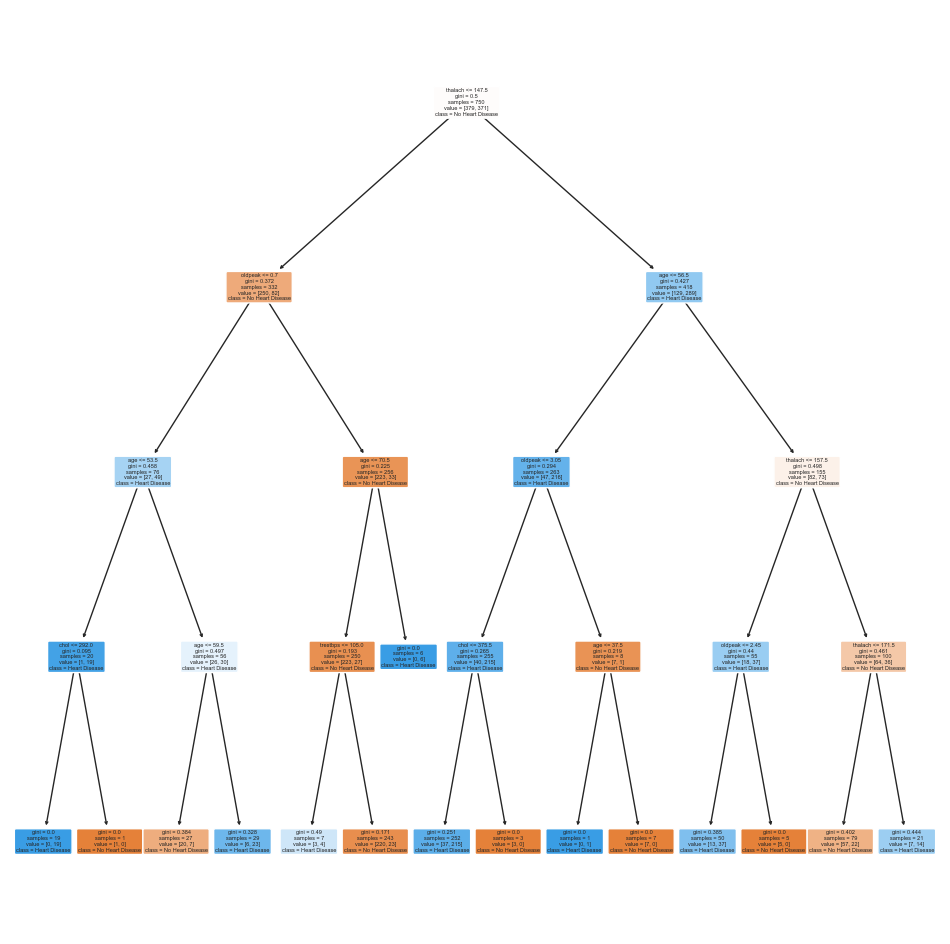

In [454]:
#Create decision tree object
dec_tree = DecisionTreeClassifier(max_depth = 4)

#Make train_splits into a 2 dimensional array
x_train = pd.concat(train_splits, axis=1)

#Train the decision tree model
dec_tree.fit(x_train, target_train)

#Plot the decision tree
f = plt.figure(figsize=(12,12))
plot_tree(dec_tree, filled=True, rounded=True, 
          feature_names = x_train.columns.tolist(),
          class_names=["No Heart Disease","Heart Disease"])

### RANDOM FOREST TREE

We use a random forest to check if predictor affects our target (more reliable compared to decision trees which are inaccurate)
Tree-based models are more forgiving on outliers than decision trees, as such we can use pre processed data to work with

In [455]:
cleaned_numerical_data = clean_data[num_var]
trestbps = pd.DataFrame(cleaned_numerical_data["trestbps"])
chol = pd.DataFrame(cleaned_numerical_data["chol"])
thalach = pd.DataFrame(cleaned_numerical_data["thalach"])
oldpeak = pd.DataFrame(cleaned_numerical_data["oldpeak"])
target = pd.DataFrame(clean_data["target"])
x = cleaned_numerical_data
y = target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

Max depth not too high or it will overfit


We use oob score as our test data(data not used in bootstrap data) as it is not seen by the bagging algorithm(data that we used to train) and thus will give a better classification accuracy of our regressor

In [456]:
#Create random forest
randomforest = RandomForestClassifier(max_depth = 25,random_state = 0,oob_score = True)
randomforest.fit(X_train, y_train)

# Access the OOB Score
oob_score = randomforest.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = randomforest.predict(x)
# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')


Out-of-Bag Score: 0.97875
Mean Squared Error: 0.003


C:\Users\brand\AppData\Local\Temp\ipykernel_15524\28038423.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X_train, y_train)


Plot the first 3 trees (Need more research on optimal tree count as 100 might be too many), taking too long to show

In [ ]:
for tree in range(2):
    plt.figure(figsize=(200, 100))
    plot_tree(randomforest.estimators_[tree], feature_names=cleaned_numerical_data.columns.tolist(), filled=True, rounded=True, fontsize=20)
    plt.show()

We can show how accurate our forest is using a confusion matrix

In [ ]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y,predictions)).plot()